# Week 2: EDA Assignment on the Weather Dataset Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\user\Downloads\Weather Data.csv')

In [3]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## Question 1: Data overview and Cleaning.

In [4]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [5]:
df.shape

(8784, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [7]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [8]:
df['Date/Time'].dtype

dtype('<M8[ns]')

In [9]:
df.isna().sum().sum()

0

In [10]:
df.duplicated().sum()

0

### Key characteristics of the dataset.
1. The dataset has 8784 rows and 8 columns.
2. The dataset consists of Categorical variables(Object) and numerical variables(int64(2),float64(2)).
3. The dataset has no null values thus no handling missing values needed.
4. The dataset has no duplicate values therefore no handling of duplicate values needed.

## Question 2: Statistical summary.

In [11]:
df.describe()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2012-07-01 23:30:00,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
min,2012-01-01 00:00:00,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,2012-04-01 11:45:00,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,2012-07-01 23:30:00,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,2012-10-01 11:15:00,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,2012-12-31 23:00:00,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005


### Statistical Summary of the dataset:
The dataset includes six key numerical features: Temperature (Temp_C), Dew Point Temperature (Dew Point Temp_C), Relative Humidity (Rel Hum_%), Wind Speed (Wind Speed_km/h), Visibility (Visibility_km), and Pressure (Press_kPa). The Temperature shows a mean of 8.80°C, with a standard deviation of 11.69°C, indicating significant variability. Dew Point Temperature has a lower mean of 2.56°C with similar variability. Relative Humidity averages 67.43%, Wind Speed averages 14.95 km/h, Visibility is generally high with a mean of 27.66 km, and Pressure has a stable mean of 101.05 kPa, showing minimal deviation.
### Identification and Description of Outliers:
The dataset reveals several potential outliers, particularly in Temperature and Dew Point Temperature. Extreme values, such as the minimum Temperature of -23.3°C and Dew Point Temperature of -28.5°C, are significantly lower than the mean and may indicate unusual weather conditions. Similarly, a Wind Speed of 83 km/h is an outlier when compared to the mean of 14.95 km/h, suggesting the occurrence of extreme weather events. These outliers could be crucial for understanding rare weather phenomena or may require further investigation to ensure data accuracy.

## Question 3: Data Visualizations.

### Visualizations to show distributions

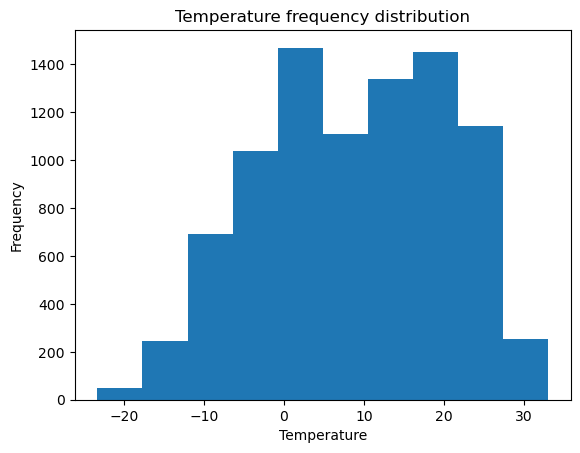

In [12]:
plt.hist(df['Temp_C'])
plt.xlabel('Temperature')
plt.ylabel('Frequency');
plt.title('Temperature frequency distribution');

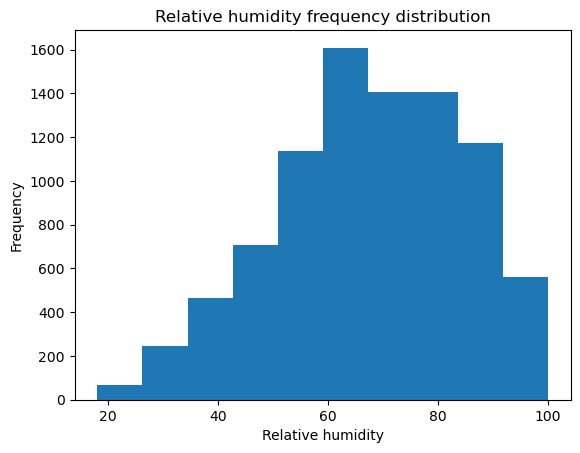

In [13]:
plt.hist(df['Rel Hum_%'])
plt.xlabel('Relative humidity')
plt.ylabel('Frequency');
plt.title('Relative humidity frequency distribution');

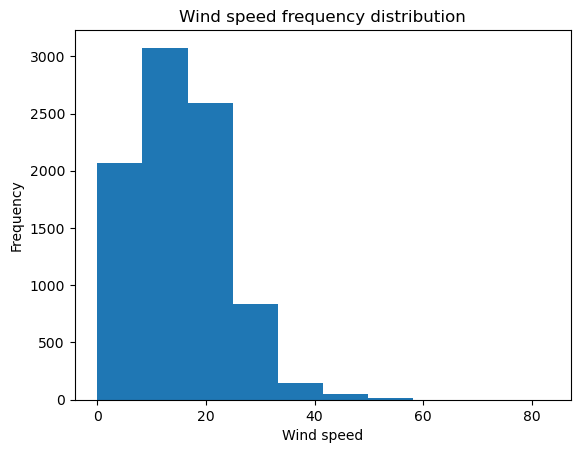

In [14]:
plt.hist(df['Wind Speed_km/h'])
plt.xlabel('Wind speed')
plt.ylabel('Frequency');
plt.title('Wind speed frequency distribution');

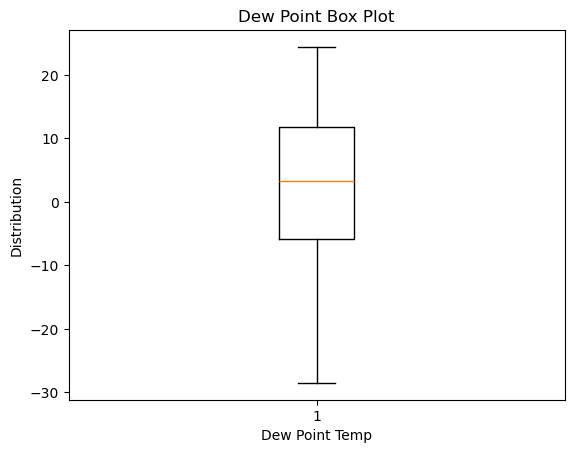

In [15]:
plt.boxplot(df['Dew Point Temp_C'])
plt.xlabel('Dew Point Temp')
plt.ylabel('Distribution');
plt.title('Dew Point Box Plot');


### Plot time series graphs.

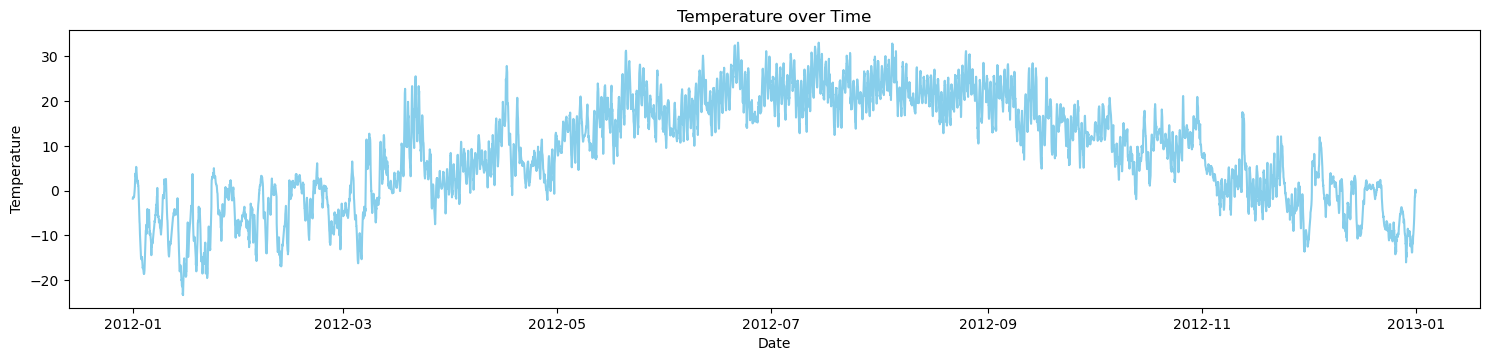

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(df['Date/Time'],df['Temp_C'],color='skyblue')
plt.title('Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

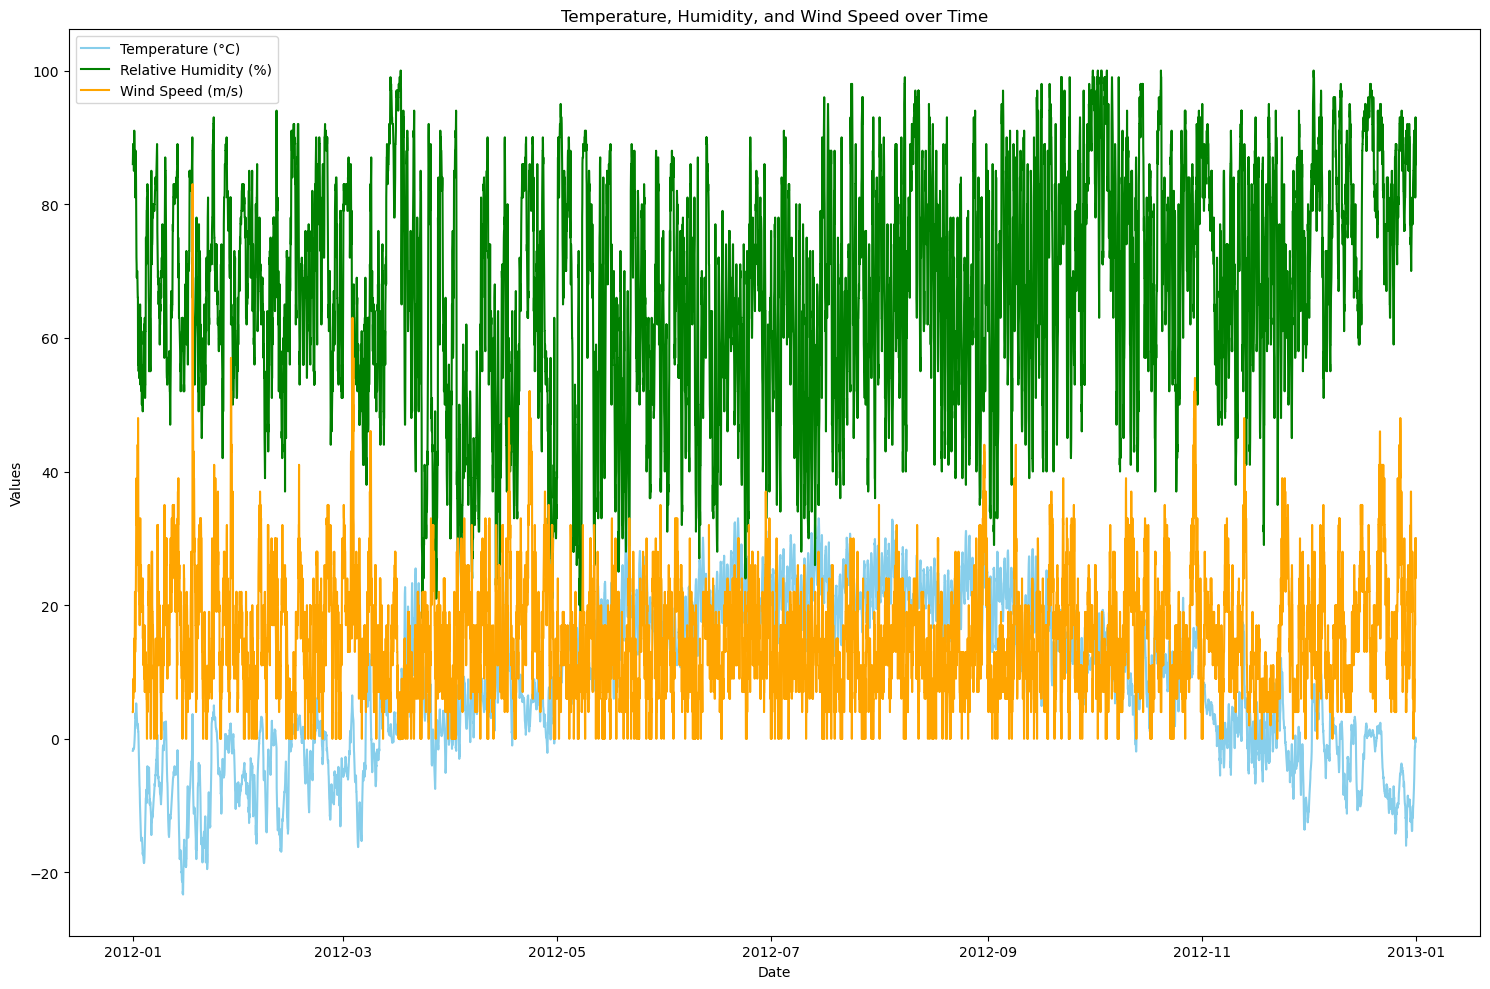

In [17]:
plt.figure(figsize=(15,10))

# Plot Temperature
plt.plot(df['Date/Time'], df['Temp_C'], color='skyblue', label='Temperature (°C)')

# Plot Humidity
plt.plot(df['Date/Time'], df['Rel Hum_%'], color='green', label='Relative Humidity (%)')

# Plot Wind Speed
plt.plot(df['Date/Time'], df['Wind Speed_km/h'], color='orange', label='Wind Speed (m/s)')

# Title and labels
plt.title('Temperature, Humidity, and Wind Speed over Time')
plt.xlabel('Date')
plt.ylabel('Values')

# Show legend
plt.legend()

# Adjust layout and display plot
plt.tight_layout()
plt.show()


In [18]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [19]:
corr_matrix=df[['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Press_kPa']].corr()
corr_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,-0.356613
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,1.000000


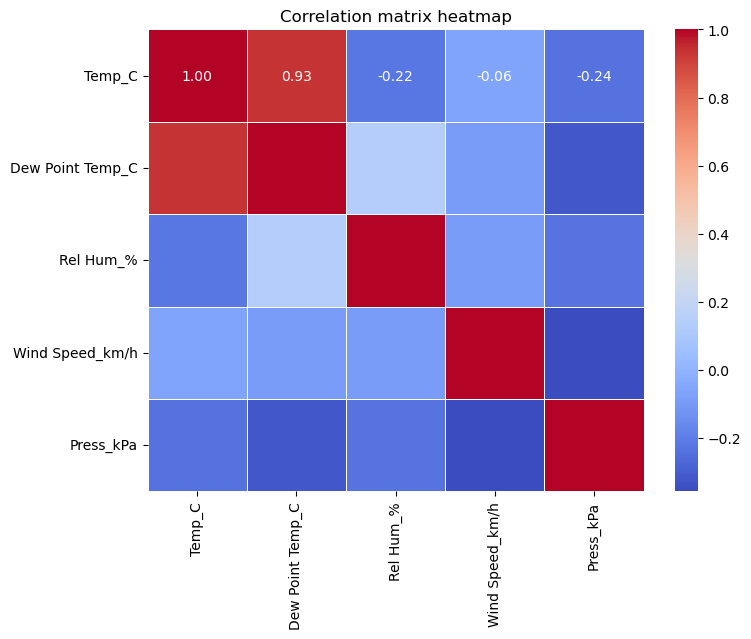

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Correlation matrix heatmap')
plt.show()

## Question 4:Weather Patterns and trends.

#### *Analyze and describe any trends or patterns you observe in the data. For instance, how do temperature and humidity vary across different seasons or months?*
The temperature shows a clear pattern based on the seasons. It tends to be cooler at the start (January-March) and finish (November-December) of the year, which matches up with winter in many places. The temperature reaches its highest point around the middle of the year (June-August), which might line up with the summer months.
The relative humidity stays high all year, never dropping below 60%. But it dips a bit in the middle of the year, from June to August. This might happen because these are the warmer summer months. On the other hand, humidity goes up at the start and end of the year. This could match up with cooler, wetter seasons.



#### *Anomalies and Unusual Patterns:*
- *Sudden Spikes in Wind Speed:* There are a few noticeable spikes in wind speed, which may indicate storms or unusual weather events. These spikes do not seem to correlate directly with temperature or humidity changes, suggesting they are isolated incidents.
- *Temperature Fluctuations:* Some sharp dips and rises in temperature could indicate abrupt weather changes, potentially caused by cold fronts or heatwaves. These anomalies might be due to specific regional climatic events.
- *Humidity Peaks and Valleys:* Although generally stable, there are moments where humidity sharply decreases or increases. These could be related to rapid temperature changes or specific weather phenomena like dry spells or rainstorms.

